# 보스턴 집값 예측하기

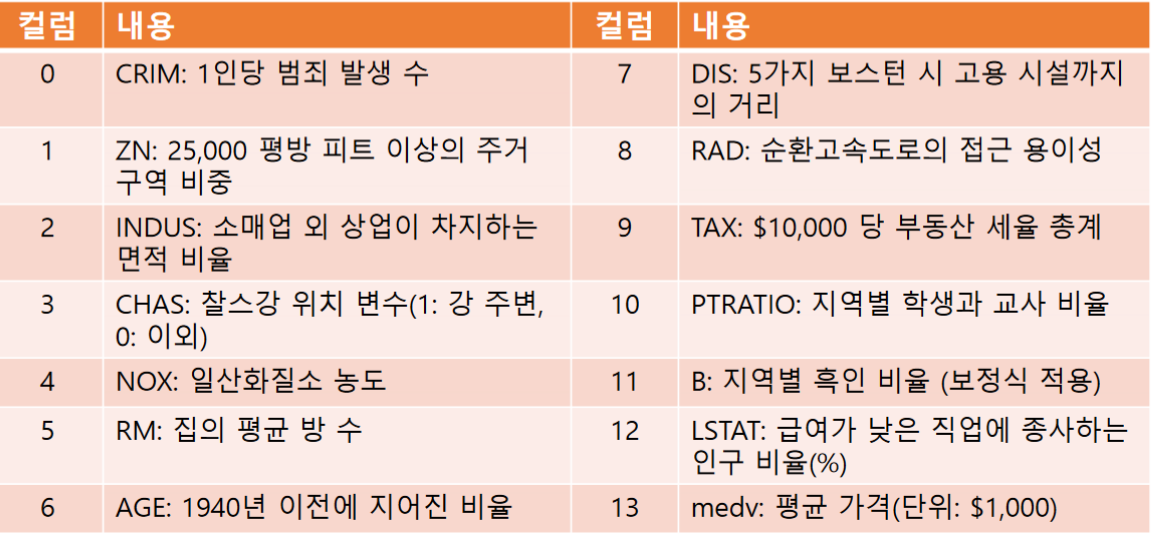

In [1]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)

df = pd.read_csv('BostonHousing.csv', header=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

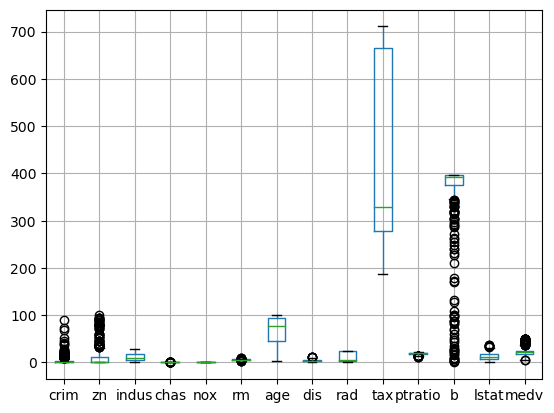

In [4]:
df.boxplot()

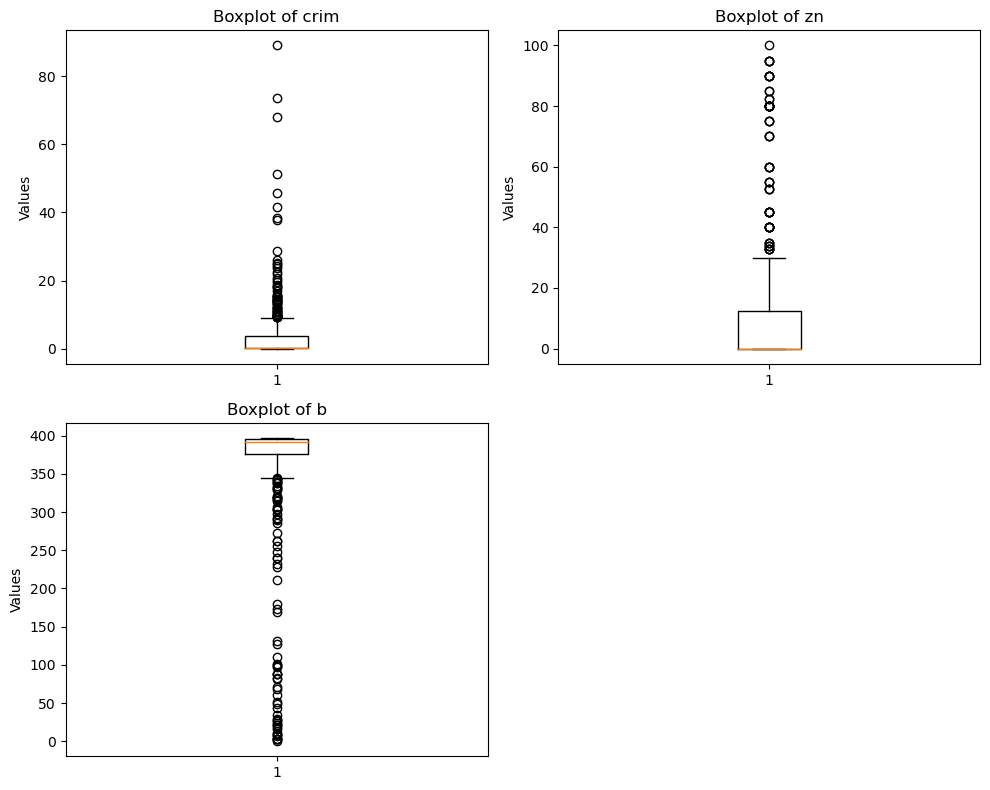

In [5]:
import matplotlib.pyplot as plt
# 서브플롯 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# crim 박스 플롯
axs[0, 0].boxplot(df['crim'])
axs[0, 0].set_title('Boxplot of crim')
axs[0, 0].set_ylabel('Values')

# zn 박스 플롯
axs[0, 1].boxplot(df['zn'])
axs[0, 1].set_title('Boxplot of zn')
axs[0, 1].set_ylabel('Values')

# b 박스 플롯
axs[1, 0].boxplot(df['b'])
axs[1, 0].set_title('Boxplot of b')
axs[1, 0].set_ylabel('Values')

# 빈 서브플롯
axs[1, 1].axis('off')  # 빈 공간을 비활성화

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 데이터 분리

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


In [8]:
import tensorflow as tf
# 세션 초기화
tf.keras.backend.clear_session()

import gc
# 가비지 컬렉션 실행
gc.collect()


22

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [10]:
# 계산 시간과 과적합 가능성을 가늠하기 위해 summary 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


(모델 로딩만으로 1.9 GB 점유된다 ㅠㅠ)

In [11]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
48/48 [==============================] - 1s 3ms/step - loss: 89.3887
Epoch 2/200
48/48 [==============================] - 0s 3ms/step - loss: 76.3986
Epoch 3/200
48/48 [==============================] - 0s 3ms/step - loss: 66.1410
Epoch 4/200
48/48 [==============================] - 0s 3ms/step - loss: 62.5072
Epoch 5/200
48/48 [==============================] - 0s 3ms/step - loss: 60.5137
Epoch 6/200
48/48 [==============================] - 0s 3ms/step - loss: 60.1863
Epoch 7/200
48/48 [==============================] - 0s 3ms/step - loss: 57.2717
Epoch 8/200
48/48 [==============================] - 0s 2ms/step - loss: 63.8365
Epoch 9/200
48/48 [==============================] - 0s 2ms/step - loss: 58.6748
Epoch 10/200
48/48 [==============================] - 0s 2ms/step - loss: 57.7958
Epoch 11/200
48/48 [==============================] - 0s 2ms/step - loss: 55.0501
Epoch 12/200
48/48 [==============================] - 0s 2ms/step - loss: 47.5576
Epoch 13/200
48/48 [=====

In [12]:
model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


array([[24.882563 ],
       [38.306717 ],
       [20.334797 ],
       [26.684742 ],
       [17.099194 ],
       [19.26336  ],
       [17.463802 ],
       [16.448244 ],
       [19.95883  ],
       [19.730003 ],
       [19.237858 ],
       [17.78876  ],
       [ 3.7999406],
       [21.0569   ],
       [20.136118 ],
       [21.100178 ],
       [18.366434 ],
       [10.111513 ],
       [45.48223  ],
       [15.233682 ],
       [24.102905 ],
       [25.150616 ],
       [14.473478 ],
       [20.957548 ],
       [18.56696  ],
       [16.803934 ],
       [24.183311 ],
       [11.9187975],
       [18.834375 ],
       [20.138184 ],
       [19.778976 ],
       [23.488794 ],
       [24.73973  ],
       [28.417145 ],
       [15.778224 ],
       [12.870275 ],
       [30.811697 ],
       [21.664482 ],
       [19.996422 ],
       [25.303246 ],
       [16.600834 ],
       [34.600952 ],
       [46.35345  ],
       [21.191885 ],
       [21.709927 ],
       [16.494421 ],
       [14.604503 ],
       [26.04

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4/4 [==============================] - 0s 1ms/step
3.9964522585238282
